In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math
from scipy import stats

In [2]:
data=pd.read_csv('titanic-passengers.csv',sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.describe()
data.sort_values(by=["Age"],ascending=[False])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
536,631,Yes,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
234,852,No,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
588,97,No,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
704,494,No,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
57,117,No,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
877,271,No,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
879,275,Yes,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
880,360,Yes,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
884,278,No,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.shape

(891, 12)

In [6]:
print(data['Cabin'].value_counts())
print(len(data['Cabin']))
print(len(data['Cabin'].unique()))

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
D              3
              ..
D10 D12        1
D46            1
D47            1
A6             1
C85            1
Name: Cabin, Length: 147, dtype: int64
891
148


In [7]:
data['Cabin'].fillna('G6',inplace=True)

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [9]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,G6,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,G6,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,G6,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,G6,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,G6,S


In [10]:
data_nna=data.dropna(axis=0,how='any')
liste=(data_nna.groupby(['Pclass','Sex'])['Age'].mean())
Age_mean_P1_m=round(liste.loc[1].loc['male'],0)
Age_mean_P1_f=round(liste.loc[1].loc['female'],0)
Age_mean_P2_m=round(liste.loc[2].loc['male'],0)
Age_mean_P2_f=round(liste.loc[2].loc['female'],0)
Age_mean_P3_m=round(liste.loc[3].loc['male'],0)
Age_mean_P3_f=round(liste.loc[3].loc['female'],0)
print(liste)

Pclass  Sex   
1       female    34.240964
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


In [11]:
data['Age'].unique()

array([28.  , 25.  , 20.  , 29.  , 31.  , 37.  , 19.  ,  1.  , 20.5 ,
       42.  , 24.  , 48.  ,   nan, 17.  , 27.  , 32.  , 38.  , 45.  ,
       30.5 , 41.  , 60.  , 50.  , 30.  , 40.  , 34.  , 36.  ,  3.  ,
       16.  ,  7.  , 23.  , 44.  , 70.5 , 22.  , 26.  , 35.  ,  0.67,
       62.  , 43.  , 18.  , 33.  ,  2.  , 39.  , 55.  , 56.  , 59.  ,
       58.  , 65.  ,  9.  , 51.  , 54.  , 28.5 , 14.  , 13.  , 21.  ,
       46.  ,  4.  , 49.  , 47.  , 74.  , 11.  , 36.5 ,  6.  , 55.5 ,
       14.5 ,  5.  , 32.5 , 15.  ,  8.  , 57.  , 10.  , 40.5 , 34.5 ,
        0.75, 64.  , 63.  , 61.  , 80.  , 24.5 , 66.  ,  0.83, 71.  ,
       45.5 , 52.  , 70.  ,  0.92, 53.  ,  0.42, 12.  , 23.5 ])

In [12]:
data_nna.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
data['Age'].unique()

array([28.  , 25.  , 20.  , 29.  , 31.  , 37.  , 19.  ,  1.  , 20.5 ,
       42.  , 24.  , 48.  ,   nan, 17.  , 27.  , 32.  , 38.  , 45.  ,
       30.5 , 41.  , 60.  , 50.  , 30.  , 40.  , 34.  , 36.  ,  3.  ,
       16.  ,  7.  , 23.  , 44.  , 70.5 , 22.  , 26.  , 35.  ,  0.67,
       62.  , 43.  , 18.  , 33.  ,  2.  , 39.  , 55.  , 56.  , 59.  ,
       58.  , 65.  ,  9.  , 51.  , 54.  , 28.5 , 14.  , 13.  , 21.  ,
       46.  ,  4.  , 49.  , 47.  , 74.  , 11.  , 36.5 ,  6.  , 55.5 ,
       14.5 ,  5.  , 32.5 , 15.  ,  8.  , 57.  , 10.  , 40.5 , 34.5 ,
        0.75, 64.  , 63.  , 61.  , 80.  , 24.5 , 66.  ,  0.83, 71.  ,
       45.5 , 52.  , 70.  ,  0.92, 53.  ,  0.42, 12.  , 23.5 ])

In [14]:
data['Age'] = np.where(((data['Age'].isna())) & (data['Pclass']==1) & (data['Sex']=='male'), Age_mean_P1_m, data['Age'])
data['Age'] = np.where(((data['Age'].isna())) & (data['Pclass']==1) & (data['Sex']=='female'), Age_mean_P1_f, data['Age'])
data['Age'] = np.where(((data['Age'].isna())) & (data['Pclass']==2) & (data['Sex']=='male'), Age_mean_P2_m, data['Age'])
data['Age'] = np.where(((data['Age'].isna())) & (data['Pclass']==2) & (data['Sex']=='female'), Age_mean_P2_f, data['Age'])
data['Age'] = np.where(((data['Age'].isna())) & (data['Pclass']==3) & (data['Sex']=='male'), Age_mean_P3_m, data['Age'])
data['Age'] = np.where(((data['Age'].isna())) & (data['Pclass']==3) & (data['Sex']=='female'), Age_mean_P3_f, data['Age'])

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [16]:
a=data['Embarked'].mode()
data['Embarked'].fillna('S',inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
cleanup={'Survived':{'No':0,'Yes':1},
          'Sex':{'male':0,'female':1}}
data.replace(cleanup,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S


In [18]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,G6,S
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,G6,S


In [56]:
z_scores=np.abs(stats.zscore(data['Age']))
data['z_scores']=z_scores
data_clean=data[data['z_scores']<3]
data_clean.reset_index(inplace=True, drop=False)
data.head()
data_clean.shape

(884, 14)

In [57]:
print(z_scores)

[0.1036164  0.33004989 0.70743903 0.02813857 0.12281708 0.57568405
 0.78291686 2.14151776 0.66970011 0.95307319 0.33004989 0.40552772
 1.40594016 0.57568405 0.17909423 0.93387251 0.17909423 0.93387251
 0.19829491 0.65116188 0.55648337 1.17950668 0.19829491 0.08507817
 0.87759536 1.40594016 2.3116741  1.55689582 0.40552772 0.93387251
 0.78291686 0.33004989 0.87759536 1.17950668 0.04733925 0.80211754
 0.34925057 0.1036164  0.50020622 1.99056211 0.80211754 0.19829491
 0.34925057 1.00935034 0.95307319 0.34925057 0.33004989 1.6886508
 0.48100554 0.1036164  0.87759536 1.55689582 0.17909423 0.19829491
 0.19829491 1.10402885 0.87759536 3.1041913  0.33004989 0.04733925
 0.55648337 0.87759536 0.04733925 0.17909423 1.6886508  0.12281708
 0.70743903 0.17909423 0.04733925 1.40594016 0.25457206 0.78291686
 0.17909423 0.1036164  0.78291686 0.80211754 0.42472839 0.87759536
 0.55648337 0.25457206 0.55648337 0.55648337 2.16642545 0.40552772
 0.17909423 0.70743903 0.25457206 0.50020622 2.46262976 0.17909

<AxesSubplot:>

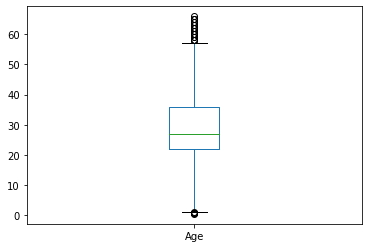

In [58]:
data_clean['Age'].plot.box()

<AxesSubplot:>

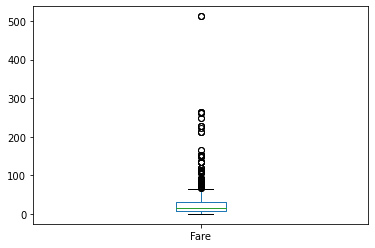

In [59]:
data_clean['Fare'].plot.box()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

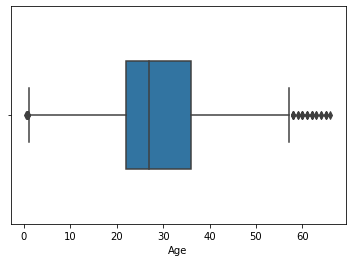

In [60]:
sns.boxplot(data_clean['Age'],width=0.5)

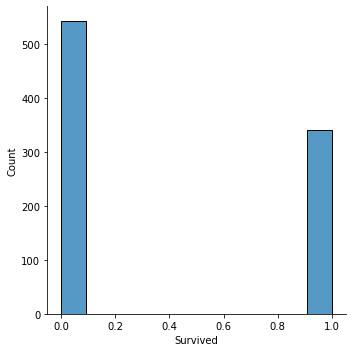

In [61]:
sns.displot(data_clean['Survived'])

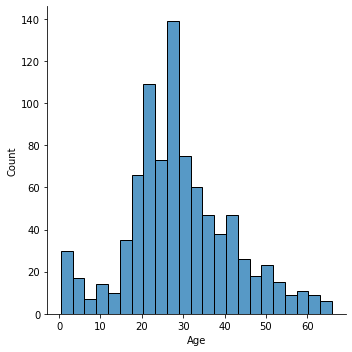

In [62]:
sns.displot(data_clean['Age'])

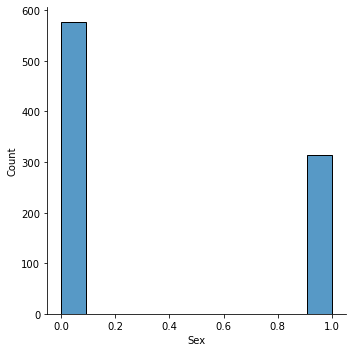

In [63]:
sns.displot(data['Sex'])

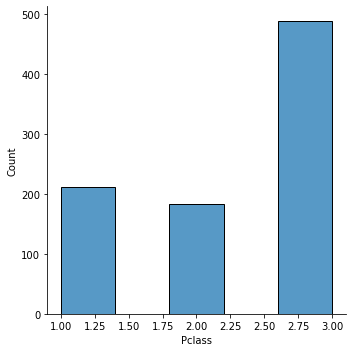

In [64]:
sns.displot(data_clean['Pclass'],bins=5)

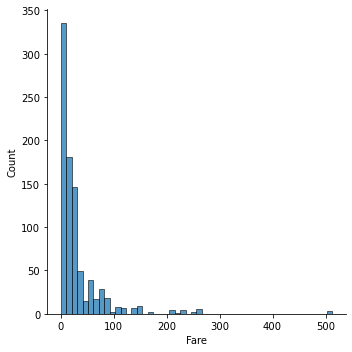

In [65]:
sns.displot(data_clean['Fare'],bins=50)

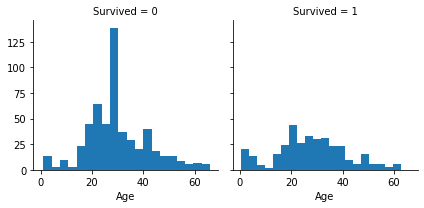

In [66]:
g=sns.FacetGrid(data_clean,col='Survived')
g.map(plt.hist,'Age',bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


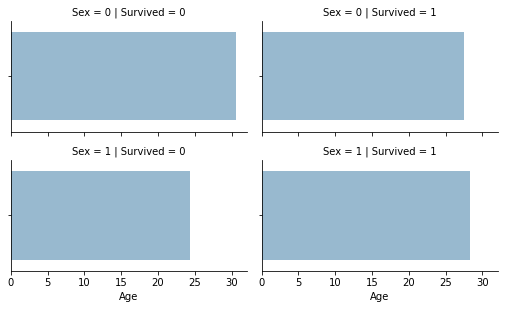

In [67]:
grid= sns.FacetGrid(data_clean, row="Sex",col='Survived' ,size=2.2, aspect=1.6)
grid.map(sns.barplot, "Age", alpha=.5, ci=None)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


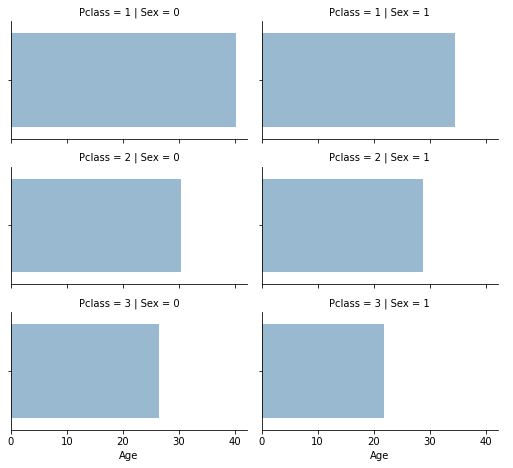

In [68]:
grid= sns.FacetGrid(data_clean, row="Pclass",col='Sex' ,size=2.2, aspect=1.6)
grid.map(sns.barplot, "Age", alpha=.5, ci=None)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


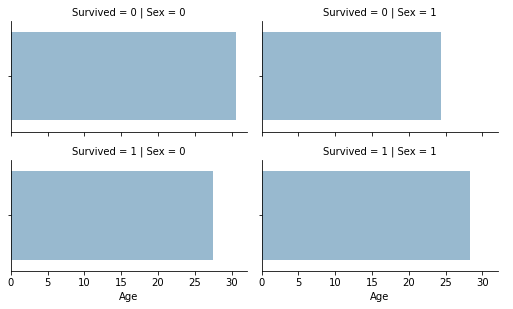

In [69]:
grid= sns.FacetGrid(data_clean, row="Survived",col='Sex' ,size=2.2, aspect=1.6)
grid.map(sns.barplot, "Age", alpha=.5, ci=None)
grid.add_legend()

In [70]:
dt=data_clean[['Age','Survived']].groupby(['Age'],as_index=False).mean()
dt['Survived'].unique()

array([1.        , 0.71428571, 0.3       , 0.83333333, 0.7       ,
       0.66666667, 0.33333333, 0.5       , 0.25      , 0.        ,
       0.8       , 0.35294118, 0.46153846, 0.34615385, 0.36      ,
       0.2       , 0.20833333, 0.52173913, 0.26086957, 0.17857143,
       0.28      , 0.45454545, 0.4       , 0.38461538, 0.625     ,
       0.61111111, 0.16666667, 0.35714286, 0.25925926, 0.41666667,
       0.11111111, 0.28571429, 0.375     , 0.6       ])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

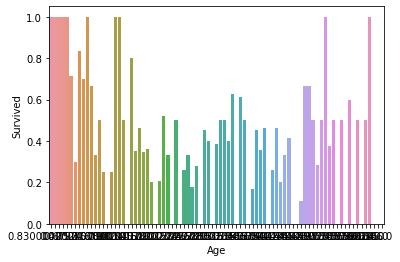

In [71]:
sns.barplot(x=dt['Age'],y=dt['Survived'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


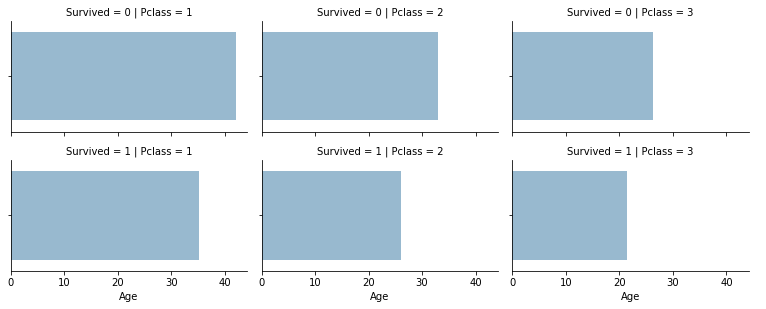

In [72]:
grid= sns.FacetGrid(data_clean, row="Survived",col='Pclass' ,size=2.2, aspect=1.6)
grid.map(sns.barplot, "Age", alpha=.5, ci=None)
grid.add_legend()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

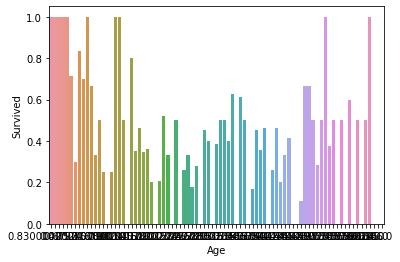

In [36]:
sns.barplot(x=dt['Age'],y=dt['Survived'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


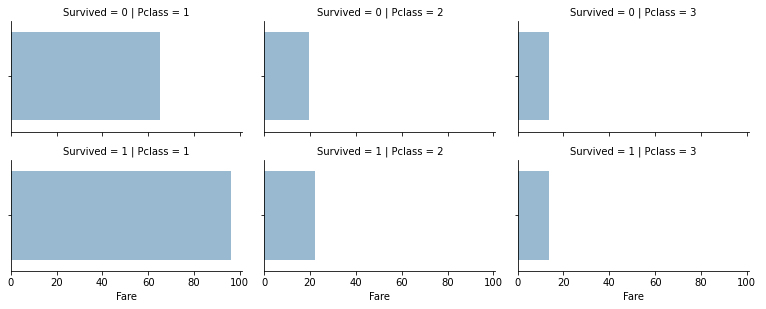

In [73]:
grid= sns.FacetGrid(data_clean, row="Survived",col='Pclass' ,size=2.2, aspect=1.6)
grid.map(sns.barplot, "Fare", alpha=.5, ci=None)
grid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

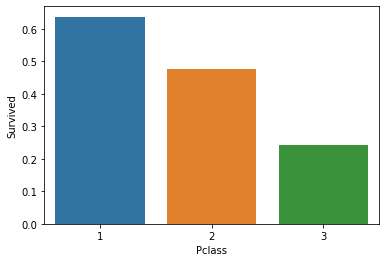

In [74]:
dt=data_clean[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x=dt['Pclass'],y=dt['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

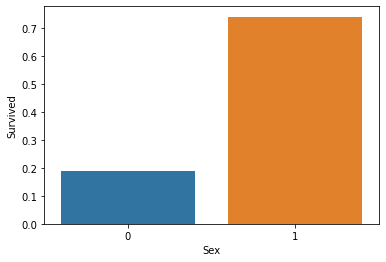

In [75]:
dt=data_clean[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()
sns.barplot(x=dt['Sex'],y=dt['Survived'])

In [76]:
data_clean.shape[0]
data_clean.head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_scores
0,0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S,0.103616
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,0.330050
2,2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S,0.707439
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S,0.028139
4,4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,0.122817
5,5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,G6,S,0.575684
6,6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,G6,S,0.782917
7,7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,G6,C,2.141518
8,8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,G6,S,0.669700
9,9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,G6,S,0.953073


In [79]:
class_age=[]

for i in range(data_clean.shape[0]):
    
    if data_clean['Age'][i]<20:
        class_age.append(0)
    elif data_clean['Age'][i]<40:
        class_age.append(1)
    elif data_clean['Age'][i]<60:
        class_age.append(2)
    else:
        class_age.append(3)
data_clean['class_age']=class_age
data_clean.head(10)

<ipython-input-79-55981eb25b4b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['class_age']=class_age


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_scores,class_age
0,0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S,0.103616,1
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,0.330050,1
2,2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S,0.707439,1
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S,0.028139,1
4,4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,0.122817,1
5,5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,G6,S,0.575684,1
6,6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,G6,S,0.782917,0
7,7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,G6,C,2.141518,0
8,8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,G6,S,0.669700,1
9,9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,G6,S,0.953073,2


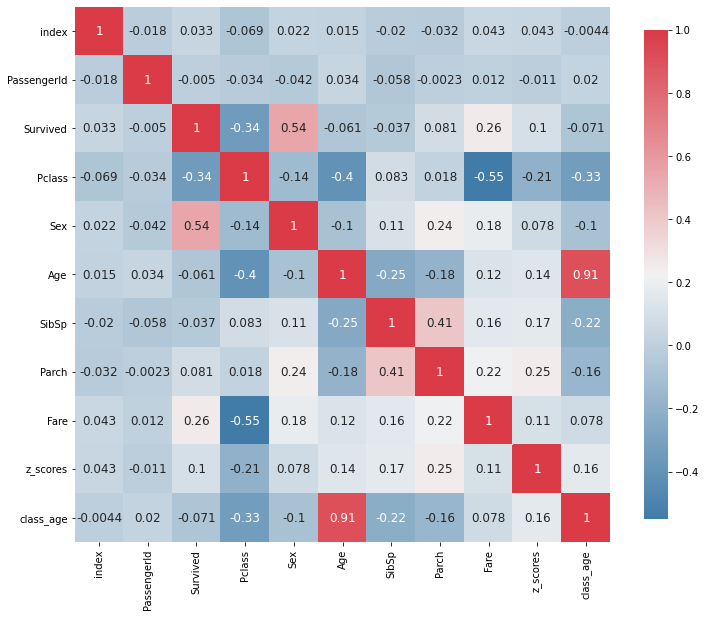

In [80]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

plot_correlation_map(data_clean)

In [81]:
data_sn=data_clean.drop('Name',axis=1)
data_sn.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_scores,class_age
0,0,343,0,2,0,28.0,0,0,248740,13.0000,G6,S,0.103616,1
1,1,76,0,3,0,25.0,0,0,348123,7.6500,F G73,S,0.330050,1
2,2,641,0,3,0,20.0,0,0,350050,7.8542,G6,S,0.707439,1
3,3,568,0,3,1,29.0,0,4,349909,21.0750,G6,S,0.028139,1
4,4,672,0,1,0,31.0,1,0,F.C. 12750,52.0000,B71,S,0.122817,1


In [82]:
Title_Dictionary = {
                    "Capt.":       "Officer",
                    "Col.":        "Officer",
                    "Major.":      "Officer",
                    "Dr.":         "Officer",
                    "Rev.":        "Officer",
                    "Jonkheer.":   "Royalty",
                    "Don.":        "Royalty",
                    "Sir." :       "Royalty",
                   "Lady." :      "Royalty",
                   "the Countess." : "Royalty",
                    "Dona.":       "Royalty",
                    "Mme.":        "Mrs",
                    "Mlle.":       "Miss",
                    "Miss." :      "Miss",
                    "Ms.":         "Mrs",
                    "Mr." :        "Mr",
                    "Mrs." :       "Mrs",
                    "Master." :    "Master"
                    }

In [83]:
Title_list=[]
for i in range(data_clean.shape[0]):
    val=data['Name'][i]
    for key in Title_Dictionary.keys():
        if key in val:
            Title_list.append(key)
data_clean['Title']=Title_list
data_clean.head()


<ipython-input-83-12ae964054c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Title']=Title_list


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_scores,class_age,Title
0,0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S,0.103616,1,Mr.
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,0.330050,1,Mr.
2,2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S,0.707439,1,Mr.
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S,0.028139,1,Mrs.
4,4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,0.122817,1,Mr.


In [84]:
data_clean['Title']=data_clean['Title'].map(Title_Dictionary)
data_clean

<ipython-input-84-57f289063c98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Title']=data_clean['Title'].map(Title_Dictionary)


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_scores,class_age,Title
0,0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S,0.103616,1,Mr
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,0.330050,1,Mr
2,2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S,0.707439,1,Mr
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S,0.028139,1,Mrs
4,4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,0.122817,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,G6,C,1.160306,0,Miss
880,887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,G6,C,0.556483,1,Miss
881,888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,G6,S,0.047339,1,Mr
882,889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,27.0,0,0,349215,7.8958,G6,S,0.179094,1,Mrs


In [85]:
data_clean['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Officer', 'Royalty', 'Master'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

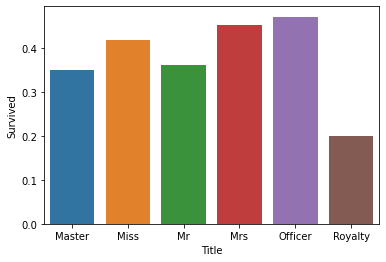

In [86]:
dt=data_clean[['Title','Survived']].groupby(['Title'],as_index=False).mean()
sns.barplot(x=dt['Title'],y=dt['Survived'])

<AxesSubplot:xlabel='Title', ylabel='Survived'>

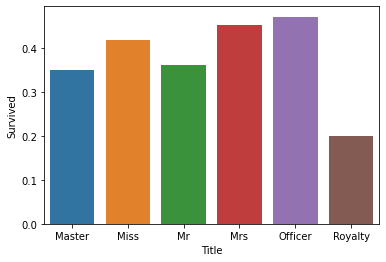

In [87]:
dt=data_clean[['Title','Survived']].groupby(['Title'],as_index=False).mean()
sns.barplot(x=dt['Title'],y=dt['Survived'])

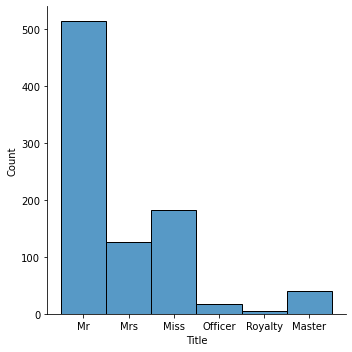

In [88]:
sns.displot(data_clean['Title'])

<AxesSubplot:xlabel='class_age', ylabel='Survived'>

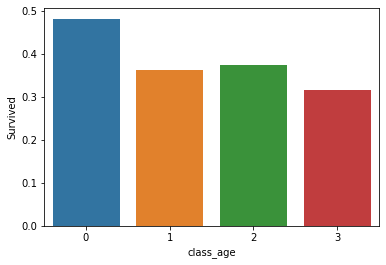

In [89]:
dt=data_clean[['class_age','Survived']].groupby(['class_age'],as_index=False).mean()
sns.barplot(x=dt['class_age'],y=dt['Survived'])

In [51]:
data_clean['SibSp'].unique()

array([0, 1, 2, 3, 5, 4, 8], dtype=int64)

In [52]:
data_clean['familysize']=data_clean['SibSp']+data_clean['Parch']

<ipython-input-52-315b25470037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['familysize']=data_clean['SibSp']+data_clean['Parch']


In [53]:
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_scores,Title,familysize
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S,0.103616,Mr,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,0.330050,Mr,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S,0.707439,Mr,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S,0.028139,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,0.122817,Mr,1


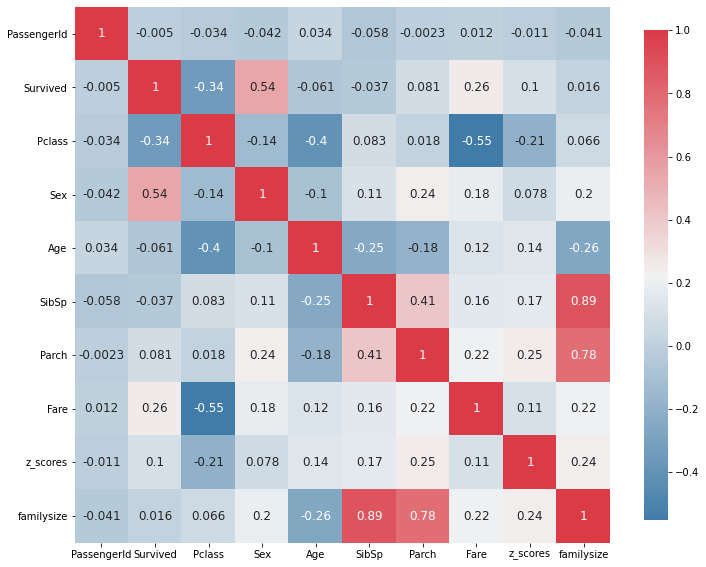

In [54]:
plot_correlation_map(data_clean)

<AxesSubplot:xlabel='familysize', ylabel='Survived'>

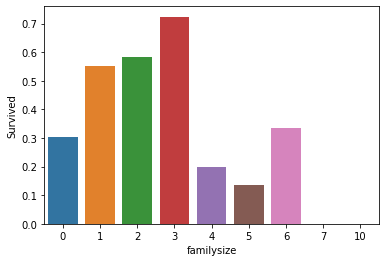

In [55]:
dt=data_clean[['familysize','Survived']].groupby(['familysize'],as_index=False).mean()
sns.barplot(x=dt['familysize'],y=dt['Survived'])